In [11]:
import jax.numpy as np
import numpy as onp
from scipy.sparse import diags
from scipy.sparse.linalg import cg
import inspect
from jax.scipy.sparse.linalg import cg as jcg
import matplotlib.pyplot as plt

In [2]:
m = 1000
d_0 = 0.5 + onp.sqrt(onp.arange(m)+1)
d_1 = onp.ones((m-1))
d_2 = onp.ones((m-100))

diagonals = [d_2,d_1,d_0,d_1,d_2]
d_sparse = diags(diagonals,[-100,-1,0,1,100])
m_sparse = diags([d_0],[0])
b = onp.ones(m)
trial_max_iteration = 40
errors = onp.zeros(trial_max_iteration)
errors_conditioned = onp.zeros(trial_max_iteration)

In [3]:
def report(xk):
    frame = inspect.currentframe().f_back
    print(frame.f_locals['resid'])

In [4]:
for i in range(trial_max_iteration):
    x,info = cg(d_sparse,b,maxiter=(i+1),tol=1e-16)
    errors[i] = onp.linalg.norm(d_sparse@x-b)**2

In [5]:
for i in range(trial_max_iteration):
    x,info = cg(d_sparse,b,maxiter=(i+1),M=m_sparse,tol=1e-16)
    errors_conditioned[i] = onp.linalg.norm(d_sparse@x-b)**2

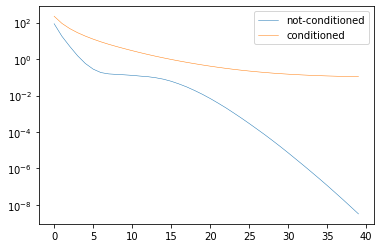

In [6]:
plt.semilogy(errors, linewidth=0.5, label='not-conditioned')
plt.semilogy(errors_conditioned, linewidth=0.5, label='conditioned')
plt.legend()

In [19]:
d_jax = np.array(d_sparse.toarray(),dtype=np.float32)
d_fun = lambda x: d_jax@x
b_jax = np.array(b,dtype=np.float32)
m_jax = np.array(m_sparse.toarray(),dtype=np.float32)
m_fun = lambda x: m_jax@x
jerrors = onp.zeros(trial_max_iteration)
jerrors_conditioned = onp.zeros(trial_max_iteration)

In [24]:
for i in range(trial_max_iteration):
    x_jax,info = jcg(d_fun,b_jax,maxiter=(i+1),tol=1e-16)
    jerrors[i] = np.linalg.norm(d_sparse@x_jax-b)**2

In [25]:
for i in range(trial_max_iteration):
    x_jax_cond,info = jcg(d_fun,b_jax,maxiter=(i+1),M=m_fun,tol=1e-16)
    jerrors_conditioned[i] = np.linalg.norm(d_sparse@x_jax_cond-b)**2

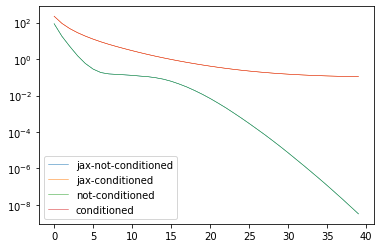

In [27]:
plt.semilogy(jerrors, linewidth=0.5, label='jax-not-conditioned')
plt.semilogy(jerrors_conditioned, linewidth=0.5, label='jax-conditioned')
plt.semilogy(errors, linewidth=0.5, label='not-conditioned')
plt.semilogy(errors_conditioned, linewidth=0.5, label='conditioned')
plt.legend()

In [23]:
jerrors


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])